# PWM Spectra

Jonathan Forhan

[Source](https://colab.research.google.com/drive/14lC8JcCz3ZeR8dxTCZHtWY6uUCtDbsEr#scrollTo=UBLLVutTP5x7)


## PWM Signal Definition

let $\alpha=$ duty cycle

$$\large{x(t)=2\alpha-1}+\displaystyle{\sum_{m=-\infty}^\infty}\frac{2}{m\pi}\sin(m\pi\alpha)e^{jm\omega_0 t}$$


In [110]:
import numpy as np
import matplotlib.pyplot as plt

PI = np.pi
N = 100


def get_c_m(duty_cycle):
    c_m = []
    for n in range(-N, N):
        if n == 0:
            c_m.append(0)
        else:
            c_m.append(2 * np.sin(n * PI * duty_cycle) / (n * PI))
    return c_m


def gen_sig(t, T, duty_cycle=0.5, c_m=None):
    a_0 = 2 * duty_cycle - 1    # DC component
    sig = a_0
    w_0 = 2*PI / T

    c_m = c_m if c_m else get_c_m(duty_cycle)

    for n in range(-N, N):
        sig += c_m[n + N] * np.exp(1j * n * w_0 * t).real # np.cos(w_0 * n * t)

    return sig

## Plot of PWM signals at varying periods

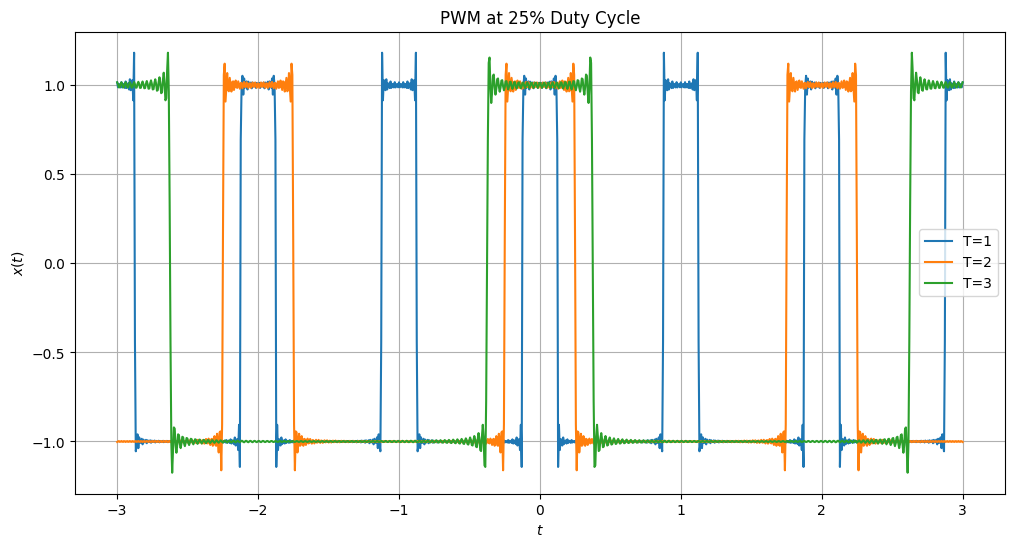

In [111]:
plt.clf
plt.figure(figsize=(12, 6))
plt.title('PWM at 25% Duty Cycle')
plt.grid(True)
plt.ylabel('$x(t)$')
plt.xlabel('$t$')

x = np.linspace(-3, 3, 1000)

y = [gen_sig(t, T=1, duty_cycle=0.25) for t in x]
plt.plot(x, y, label='T=1')

y = [gen_sig(t, T=2, duty_cycle=0.25) for t in x]
plt.plot(x, y, label='T=2')

y = [gen_sig(t, T=3, duty_cycle=0.25) for t in x]
plt.plot(x, y, label='T=3')

plt.legend(loc='best')
plt.show()

## PWM Spectra Derivation

$\textrm{let }\alpha = \textrm{ duty cycle}$

$\textrm{let }\beta = \frac12\alpha$

$\textrm{let }A = \textrm{ Amplitude}$

$$\large{x(t)=a_0+\displaystyle{\sum_{m=-\infty}^{\infty}}C_me^{jm\omega_0t}}$$

<br>

$$a_0=\frac{1}{T_0}\left(\displaystyle{\int_0^{\alpha T_0}(A)dt+\int_{\alpha T_0}^{T_0}}(-A)dt\right)$$

$$a_0=\frac{1}{T_0}\left(A(\alpha T_0)-A(T_0-\alpha T_0)\right)$$

$$\textrm{factor out }T_0$$

$$a_0=A(\alpha)+A(-1+\alpha)$$

$$a_0=A(2\alpha-1)$$

$$\textrm{in our case }A\textrm{ is 1}$$

$$a_0=2\alpha-1$$

<br>

$$C_m=\frac{2A}{T_0}\displaystyle{\int_{-\beta T_0}^{\beta T_0}}x(t)\space e^{-jm\omega_0t}dt$$

$$C_m=\frac{2}{T_0}\frac{1}{-jm\omega_0}e^{-jm\omega_0t}\bigg\vert_{-\beta T_0}^{\beta T_0}$$

$$C_m=\frac{2}{-jm\omega_0T_0}\left(e^{-jm\omega_0\beta T_0}-e^{jm\omega_0\beta T_0}\right)$$

$$C_m=\frac{2}{-jm\omega_0T_0}\left(e^{-jm\omega_0\beta T_0}-e^{jm\omega_0\beta T_0}\right)\times\frac{2j}{2j}$$

$$C_m=\frac{4}{m\omega_0T_0}\left(\frac{e^{jm\omega_0\beta T_0}+e^{-jm\omega_0\beta T_0}}{2j}\right)$$

$$C_m=\frac{2}{m\pi}\sin(m\pi\alpha)$$

<br>

$$\textrm{thus}$$

$$\large{x(t)=2\alpha-1}+\displaystyle{\sum_{m=-\infty}^\infty}\frac{2}{m\pi}\sin(m\pi\alpha)e^{j m\omega_0t}$$

<br>
<br>

$\textrm{let }f = 2078051 \textrm{ (my student ID)}$

$\textrm{let }T_0 = \frac{1}{f} = 481\times10^{-9}$

$$\large{x(t)=2\alpha-1}+\displaystyle{\sum_{m=-\infty}^\infty}\frac{2}{m\pi}\sin(m\pi\alpha)e^{jmt(13.06\times10^{6})}$$

## Plot of the square wave with a frequency of my student ID

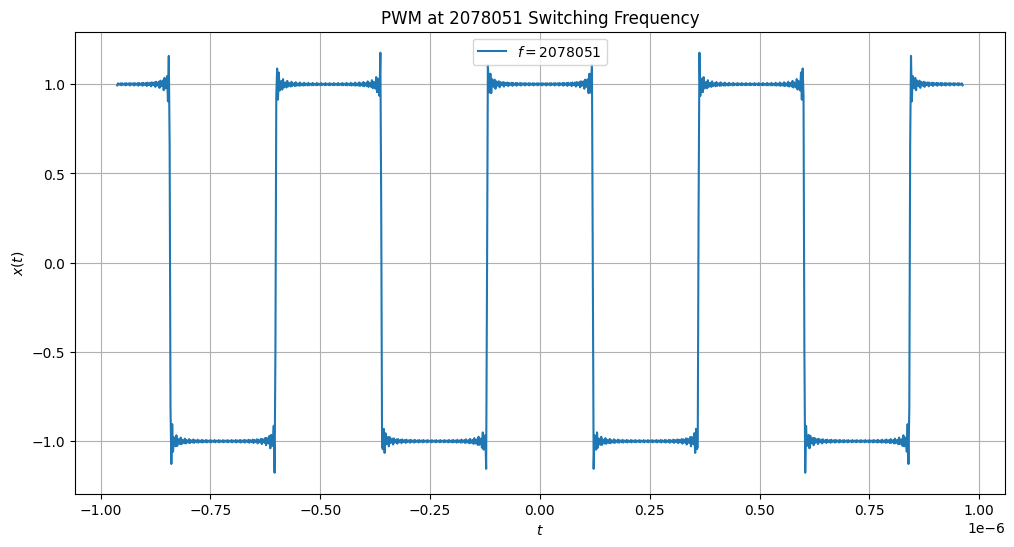

In [112]:
plt.clf
plt.figure(figsize=(12, 6))
plt.title('PWM at 2078051 Switching Frequency')
plt.grid(True)
plt.ylabel('$x(t)$')
plt.xlabel('$t$')

f = 2078051
T = 1 / f

x = np.linspace(-2 * T, 2 * T, 1000)

y = [gen_sig(t, T, duty_cycle=0.50) for t in x]
plt.plot(x, y, label='$f=2078051$')

plt.legend(loc='best')
plt.show()

## Square waves with varied duty cycles of 10%, 25%, 50%, 75%, 90%, and 100%

<ipython-input-113-31aa70880c2b>:24: RuntimeWarning: divide by zero encountered in log10
  plt.stem(n_s, 20*np.log10(np.abs(c_signal)), 'g', label='Magnitude', bottom=-100)


<Figure size 640x480 with 0 Axes>

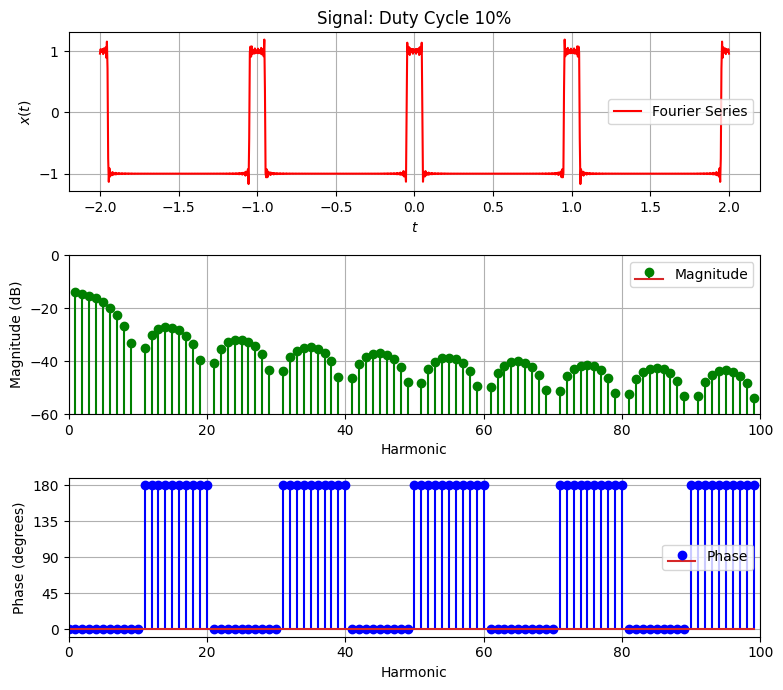

<Figure size 640x480 with 0 Axes>

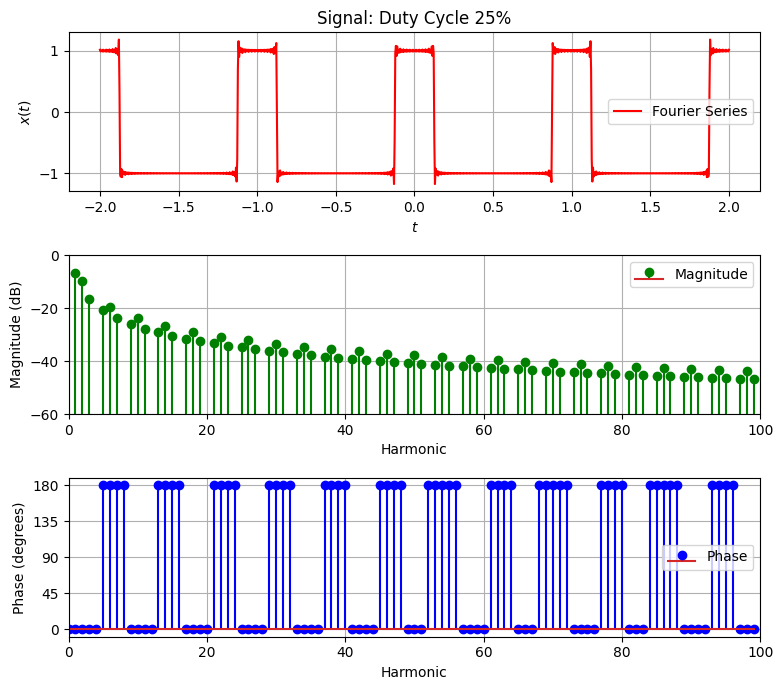

<Figure size 640x480 with 0 Axes>

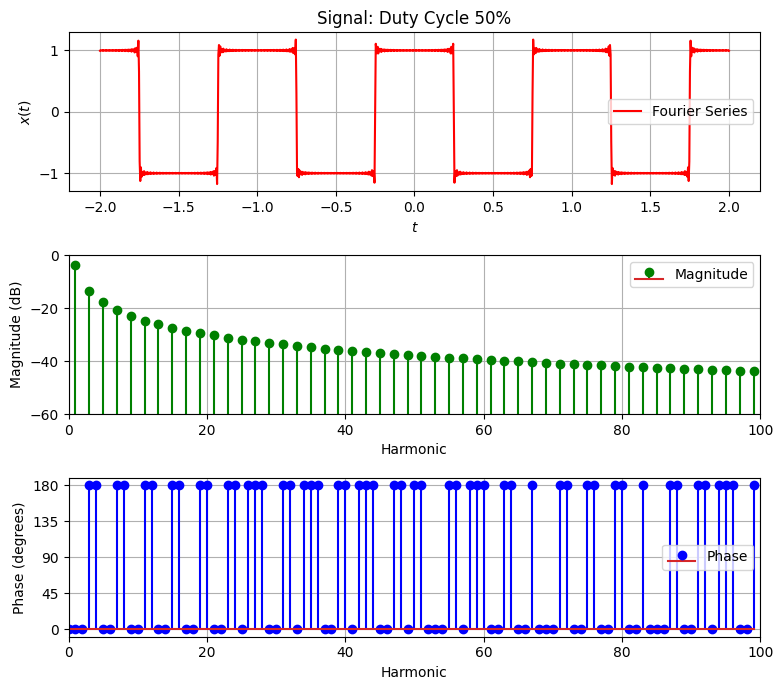

<Figure size 640x480 with 0 Axes>

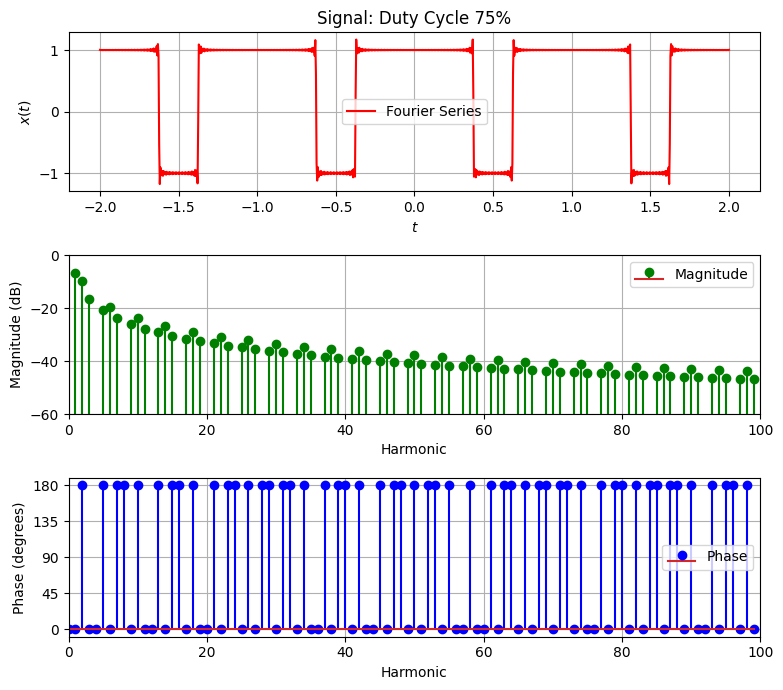

<Figure size 640x480 with 0 Axes>

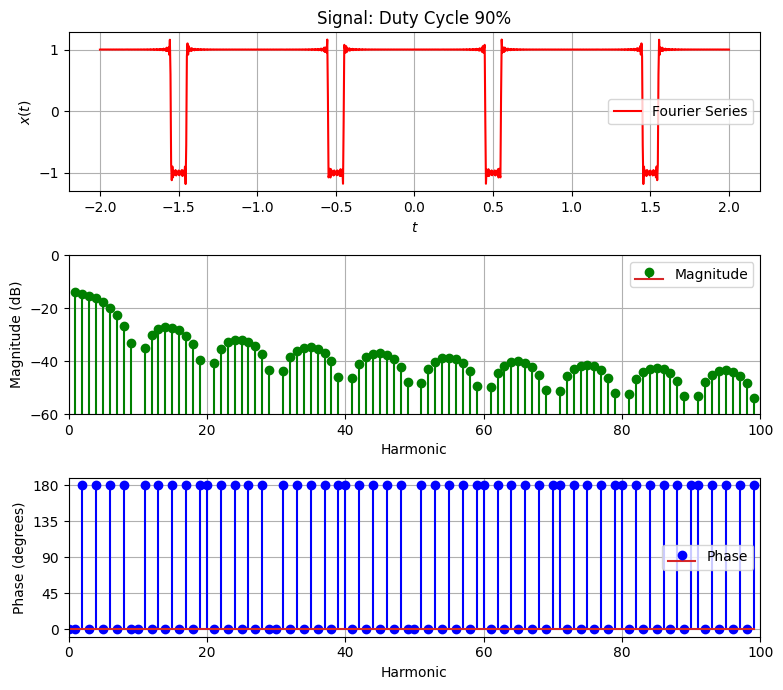

<Figure size 640x480 with 0 Axes>

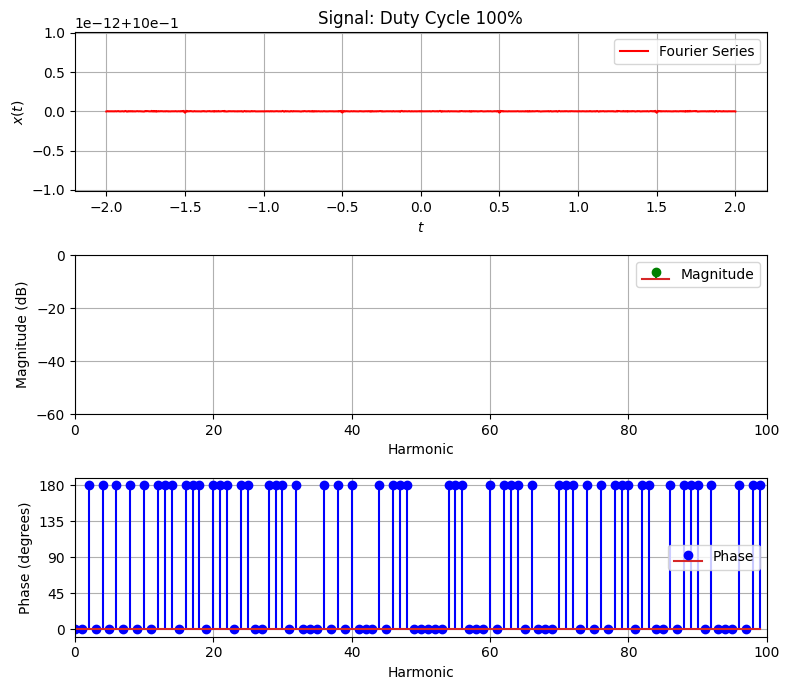

In [113]:
duty_cycles = [0.1, 0.25, 0.5, 0.75, 0.90, 1.0]

for duty_cycle in duty_cycles:
    plt.clf()

    c_signal = get_c_m(duty_cycle)

    x = np.linspace(-2, 2, 1000)
    y = [gen_sig(t, T=1, duty_cycle=duty_cycle, c_m=c_signal) for t in x]
    n_s = np.arange(0, N)

    c_signal =  c_signal[int(len(c_signal) / 2):]

    plt.figure(figsize=(8, 7))
    plt.subplot(311)
    plt.plot(x, y, 'r', label='Fourier Series')
    plt.grid(True)
    plt.ylabel('$x(t)$')
    plt.xlabel('$t$')
    plt.legend(loc='best')
    plt.title('Signal: Duty Cycle %d%%' % (duty_cycle * 100))
    plt.tight_layout()
    plt.subplot(312)
    plt.stem(n_s, 20*np.log10(np.abs(c_signal)), 'g', label='Magnitude', bottom=-100)
    plt.grid(True)
    plt.xlabel('Harmonic')
    plt.ylabel('Magnitude (dB)')
    plt.axis([0, 100, -60, 0])
    plt.legend(loc='best')
    plt.tight_layout()
    plt.subplot(313)
    plt.stem(n_s, 180/np.pi*np.angle(c_signal), 'b', label='Phase')
    plt.grid(True)
    plt.xlabel('Harmonic')
    plt.ylabel('Phase (degrees)')
    plt.xlim([0, 100])
    plt.yticks(np.arange(0, 181, 45))
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

## DC component, fundamental frequency, and the first 5 harmonics as a function of duty cycle (1-100)%

<Figure size 640x480 with 0 Axes>

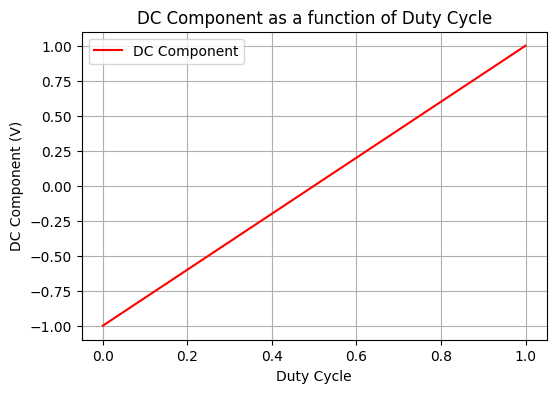

<Figure size 640x480 with 0 Axes>

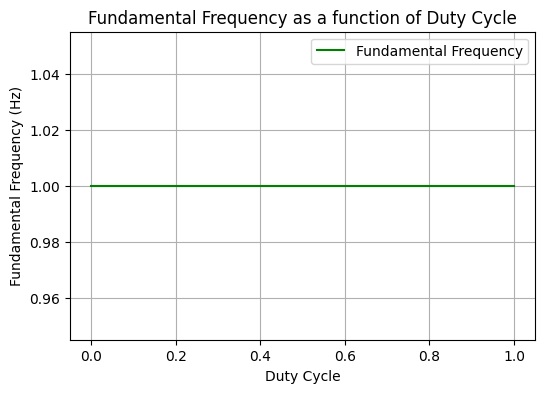

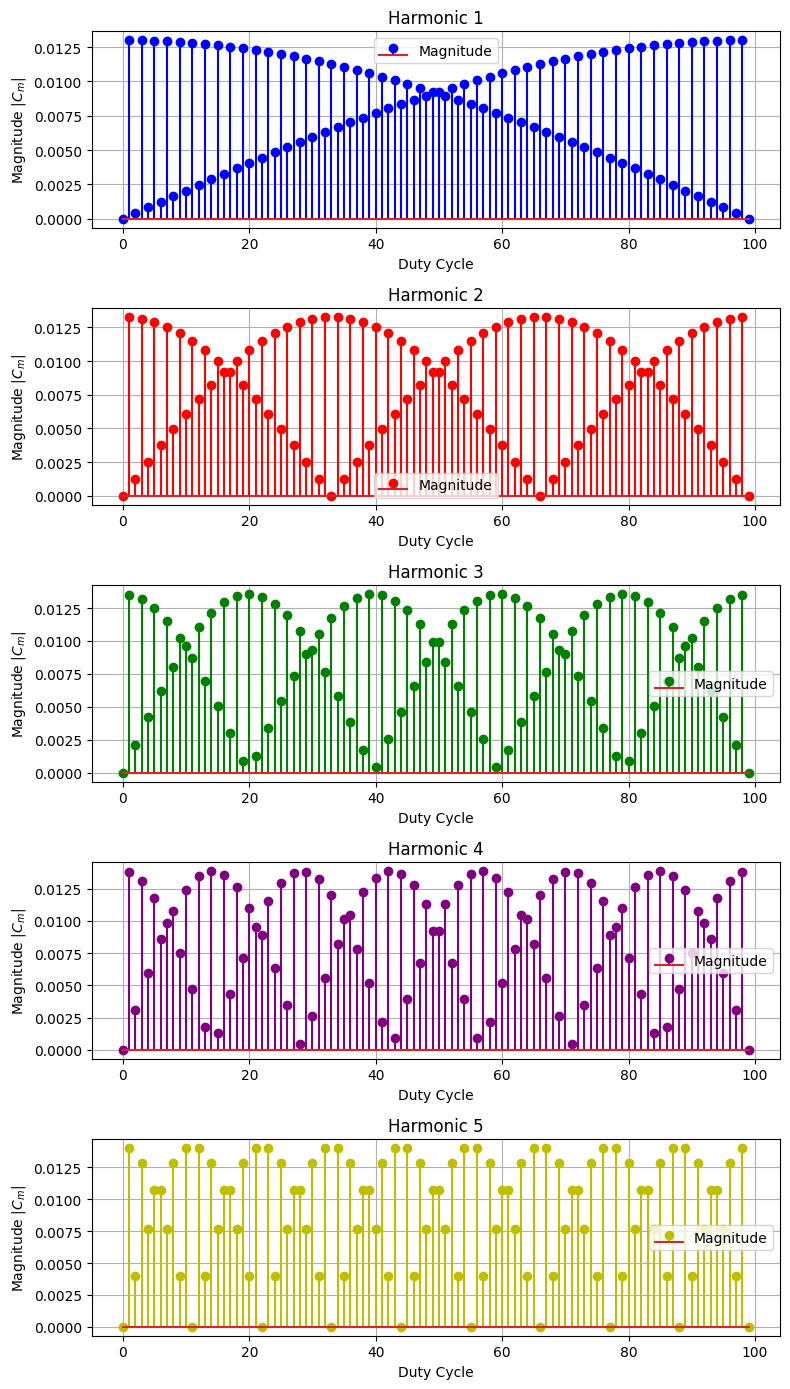

In [47]:
# Components as a fucntion of duty cycle

# DC component
def get_dc(duty_cycle):
    return 2 * duty_cycle - 1

x = np.linspace(0, 1.0, 100)

dc = [get_dc(d) for d in x]

plt.clf()
plt.figure(figsize=(6, 4))
plt.plot(x, dc, 'r', label='DC Component')
plt.grid(True)
plt.ylabel('DC Component (V)')
plt.xlabel('Duty Cycle')
plt.legend(loc='best')
plt.title('DC Component as a function of Duty Cycle')
plt.show()


# Fundamental Frequency
def get_ff(duty_cycle):
    T = 1
    return 1 / T

ff = [get_ff(d) for d in x]

plt.clf()
plt.figure(figsize=(6, 4))
plt.plot(x, ff, 'g', label='Fundamental Frequency')
plt.grid(True)
plt.ylabel('Fundamental Frequency (Hz)')
plt.xlabel('Duty Cycle')
plt.legend(loc='best')
plt.title('Fundamental Frequency as a function of Duty Cycle')
plt.show()


# First 5 Harmonics
plt.figure(figsize=(8, 14))

c_ms = [get_c_m(d) for d in x]                          # get harmonics
c_ms = [c_m[int(len(c_ms) / 2):][1:6] for c_m in c_ms]  # trim to 5

h = [[], [], [], [], []]
for c_m in c_ms:
    for i, c_n in enumerate(c_m):
        h[i].append(c_n)


colors = ['b', 'r', 'g', 'purple', 'y']
n_s = np.arange(0, N)

for i in range(5):
    plt.subplot(511 + i)
    plt.grid(True)
    plt.stem(n_s, np.abs(h[i]), colors[i], label='Magnitude')
    plt.ylabel('Magnitude $|C_m|$')
    plt.xlabel('Duty Cycle')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.title('Harmonic %d' % (i + 1))

plt.show()

## External Resources

- [Swarthmore College Fourier Series](https://lpsa.swarthmore.edu/Fourier/Series/ExFS.html)